In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

25
26


<IPython.core.display.Javascript object>


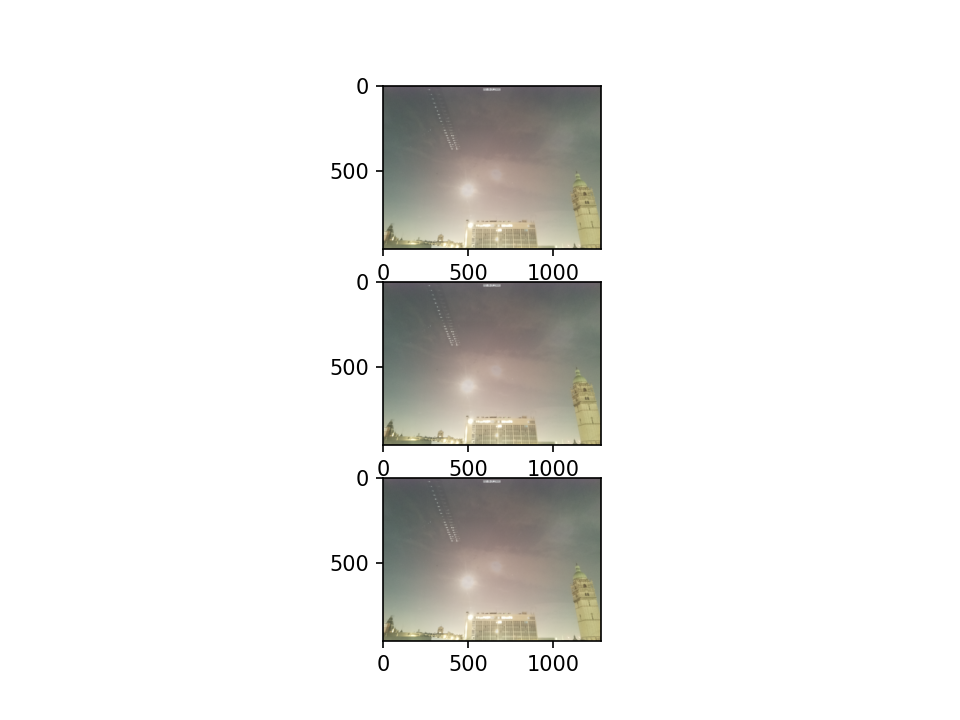

In [3]:
filepath = r"C:/Users/kathe/OneDrive - Imperial College London\MSci Project/longExposures/"
date = 25
filename = f'tl_2021-09-23_230002_CAL1.jpg'
imga = cv.imread(filepath+filename)
imga = cv.cvtColor(imga, cv.COLOR_BGR2RGB)
imgb = cv.imread(filepath+f'/tl_2021-09-24_230002_CAL1.jpg')
imgb = cv.cvtColor(imgb, cv.COLOR_BGR2RGB)
#output = imga.copy()

# a_channel = np.ones(img.shape, dtype=np.float32)/2.0
# image = img*a_channel
alpha = 0.5
#cv.addWeighted(imga, alpha, imgb, 1 - alpha, 0, output)
start = np.ones(imga.shape)

while date < 27:
    print(date)
    filename1 = f'tl_2021-09-{date}_230002_CAL1.jpg'
    filename2 = f'tl_2021-09-{date+1}_230002_CAL1.jpg'
    img1 = cv.imread(filepath+filename1)
    img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
    img2 = cv.imread(filepath+filename2)
    img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
    output1 = cv.addWeighted(imga, alpha, imgb, 1 - alpha, 0, start)
    output2 = cv.addWeighted(img1, alpha, output1, 1 - alpha, 0, output1)
    output3 = cv.addWeighted(img2, alpha, output2, 1 - alpha, 0, output2)
    date +=1

fig, (ax1,ax2,ax3) = plt.subplots(3,1)
ax1.imshow(output1)
ax2.imshow(output2)
ax3.imshow(output3)
plt.show()  




<IPython.core.display.Javascript object>


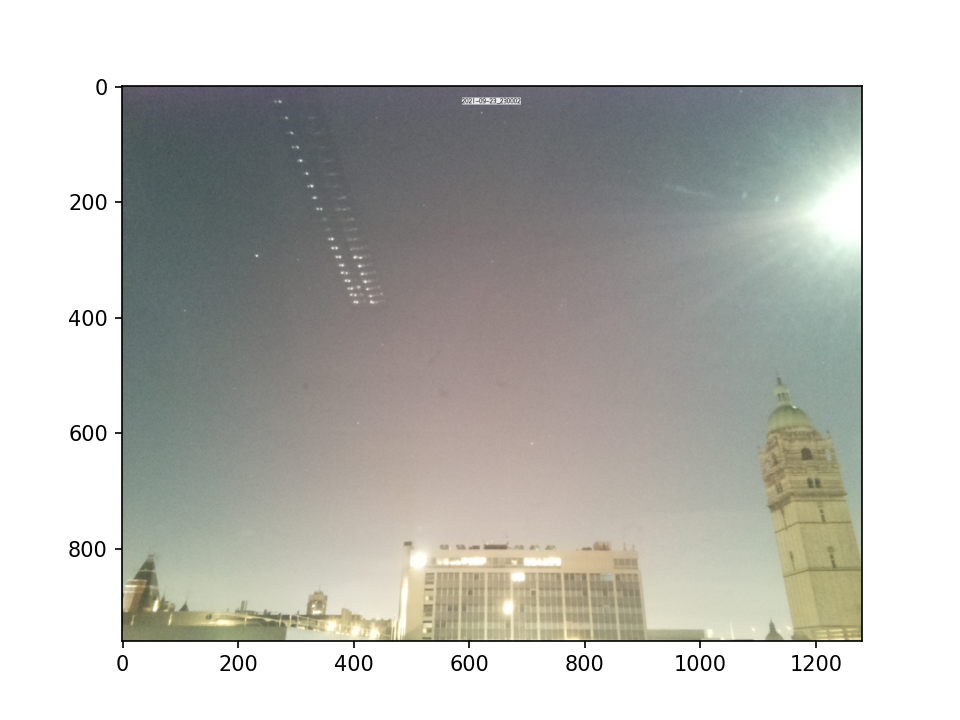

In [10]:
filepath = r"C:/Users/kathe/OneDrive - Imperial College London\MSci Project/longExposures/"
date = 23
filename = f'tl_2021-09-{date}_230002_CAL1.jpg'
img = cv.imread(filepath+filename)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(1,1)
ax.imshow(img)


In [43]:
camM = np.array([[5.063166013857816665e+02,0.000000000000000000e+00,3.166661931952413056e+02],
                [0.000000000000000000e+00,5.067357512519903935e+02,2.526423174030390157e+02],
                [0.000000000000000000e+00,0.000000000000000000e+00,1.000000000000000000e+00]])
distortion = np.array([2.326755157584974587e-01,-6.011054678561147391e-01,3.963575587693899294e-04,-2.566491984608918874e-04,4.822591716560123420e-01])
moon_dist = 3.844e8

camM_inv = np.linalg.inv(camM)
#moon_im is pixel coordinates in image plane (origin top left)
#moon_cam is in camera coordinate system (origin optical centre)
#moon_world is in world coordinate system
moon_im = np.array([[1275, 207], [1047,313], [847,430], [662,523], [496,614], [709,396], [912,156], [1010,82], [813,500]])

moon_cam = []
moon_im3d = []
for point in moon_im:
    point = np.append(point,1)
    moon_im3d.append(point)
    moon_cam3d = np.matmul(camM_inv, point)
    moon_cam.append(moon_cam3d[0:2])
    #moon_cam.append(moon_dist*moon_cam_2d*1e-3)
moon_cam = np.array(moon_cam)
moon_im3d = np.array(moon_im3d)
print(moon_im3d)

[[1275  207    1]
 [1047  313    1]
 [ 847  430    1]
 [ 662  523    1]
 [ 496  614    1]
 [ 709  396    1]
 [ 912  156    1]
 [1010   82    1]
 [ 813  500    1]]


In [42]:
azi = np.array([106.6, 94.7, 83.4, 72.8, 62.8, 75.5, 100.3, 107.0, 92.2])
elev = np.array([26.2, 23.5, 19.6, 15.1, 10.2, 22.0, 42.4, 44.6, 25.1])
moon_y = moon_dist*np.sin(elev)
moon_x = moon_dist*np.cos(azi)
moon_world_2d = list(zip(azi,elev))
moon_world_2d = np.array(moon_world_2d)

moon_world = []
for coord in moon_world_2d:
    coord = np.append(coord,1)
    moon_world.append(coord)
moon_world = np.array(moon_world)
print(moon_world)

[[106.6  26.2   1. ]
 [ 94.7  23.5   1. ]
 [ 83.4  19.6   1. ]
 [ 72.8  15.1   1. ]
 [ 62.8  10.2   1. ]
 [ 75.5  22.    1. ]
 [100.3  42.4   1. ]
 [107.   44.6   1. ]
 [ 92.2  25.1   1. ]]


[[ 8.50220621e-01  7.83692643e+00  1.61657174e+02]
 [-5.40573015e+00 -1.12621921e+00  6.89777919e+02]
 [-9.33327870e-03  1.34111074e-02  1.00000000e+00]]


<IPython.core.display.Javascript object>


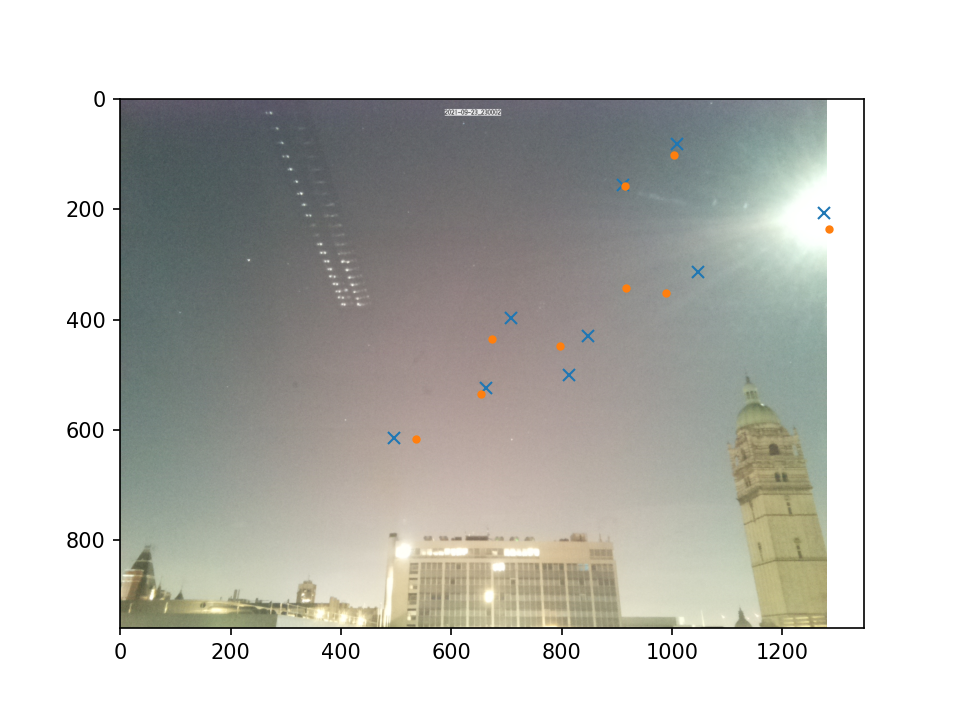

In [91]:
#cv.solvePnP(moon_world, moon_cam, camM, distortion)
world2px, __ = cv.findHomography(moon_world, moon_im3d, cv.RANSAC, 300)
print(world2px)
stars_world = np.array([[48.1,26.1],[42.4,20.6],[47.2,14.2],[51.8,26.3],[53,23.7],[53.7,24.2],[60.3,18.8],[58,11.3],[79,22.1],[74.8,9.1]])

def remap(homography, world):
    remapped = []
    for p in world:
        p = np.append(p,1)
        val = (np.matmul(homography,p))
        val[0] = val[0]/val[2]  #see documentation of cv2.findHomography
        val[1] = val[1]/val[2]
        remapped.append(val)
    return np.array(remapped)

stars_im = remap(world2px, stars_world)
moon_im2 = remap(world2px, moon_world_2d)


fig,ax = plt.subplots(1,1)
ax.imshow(img)
#ax.plot(stars_im[:,0], stars_im[:,1], '.')
ax.plot(moon_im[:,0], moon_im[:,1], 'x')
ax.plot(moon_im2[:,0], moon_im2[:,1], '.')
plt.savefig('moonPositions.png', bbox_inches='tight')

with 1 (True,
 array([[ 2.30333812],
        [-1.00146032],
        [ 0.55448031]]),
 array([[-7733.51028777],
        [-6094.34741406],
        [12632.08126632]]))
        
with moon_dist (True,
 array([[ 2.35506414],
        [-0.07988033],
        [-0.78726799]]),
 array([[2.14431812e+08],
        [2.15567118e+08],
        [2.35187534e+08]]))
        
with all dists:
(True,
 array([[-0.96079699],
        [-0.58348974],
        [-1.19393848]]),
 array([[-1.50472620e+08],
        [-5.46748638e+08],
        [ 2.25512119e+08]]))